<a href="https://colab.research.google.com/github/silverstar0727/study-/blob/master/kaggle_nlp_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dojeongmin","key":"cc2d715f506db2e541493bbf88bf28ec"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        285           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        123           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        367           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2409           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      18219           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4782           False  
connectx

In [ ]:
!kaggle competitions download -c word2vec-nlp-tutorial

 35% 9.00M/26.0M [00:00<00:00, 34.6MB/s]
100% 26.0M/26.0M [00:00<00:00, 65.5MB/s]
  0% 0.00/276k [00:00<?, ?B/s]
100% 276k/276k [00:00<00:00, 82.5MB/s]
 62% 8.00M/13.0M [00:00<00:00, 82.1MB/s]
100% 13.0M/13.0M [00:00<00:00, 82.0MB/s]
 71% 9.00M/12.6M [00:00<00:00, 40.0MB/s]
100% 12.6M/12.6M [00:00<00:00, 42.1MB/s]


In [ ]:
# sample Submission을 제외한 모든 파일이 zip파일임
# 파일 압축 풀기
import zipfile

DATA_IN_PATH = '/content/' # 현재 파일이 지정된 경로
file_list = ['labeledTrainData.tsv.zip', 'unlabeledTrainData.tsv.zip', 'testData.tsv.zip']

for file in file_list:
  zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
  zipRef.extractall(DATA_IN_PATH)
  zipRef.close()

In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)

In [ ]:
train_data.head()
# sentiment는 감정 label 
# 1은 긍정 0은 부정

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


## EDA

In [ ]:
# 데이터 분석 순서
## 데이터 크기 -> 데이터 개수 -> 문자 길이 분포 -> 많이 사용된 단어 -> 긍정, 부정 데이터의 분포
## -> 각 리뷰의 단어 개수 분포 -> 특수문자 및 대문자, 소문자 비율

# os라이브러리를 이용해서 tsv파일중 zip파일이 아닌 파일들을 가져와서 크기를 출력함
print('파일 크기: ')
for file in os.listdir(DATA_IN_PATH):
  if ('tsv' in file) and ('zip' not in file):
    print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기: 
unlabeledTrainData.tsv        67.28MB
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB


In [ ]:
# 학습데이터 개수 출력
print(len(train_data))

25000


In [ ]:
# 각 문장의 길이 몇개만 알아보기
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

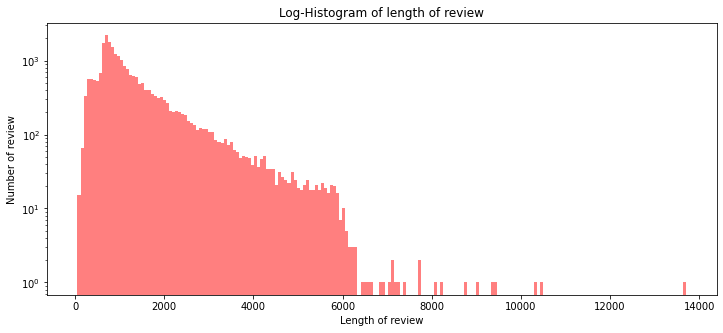

In [ ]:
# 리뷰 길이 시각화
plt.figure(figsize = (12, 5))
plt.hist(train_length, bins = 200, alpha = 0.5, color = 'r', label = 'word')
plt.yscale('log', nonposy = 'clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [ ]:
train_length.describe()

count    25000.000000
mean      1329.710560
std       1005.239246
min         54.000000
25%        705.000000
50%        983.000000
75%       1619.000000
max      13710.000000
Name: review, dtype: float64

In [ ]:
# 워드 클라우드
!pip install wordcloud

(-0.5, 799.5, 599.5, -0.5)

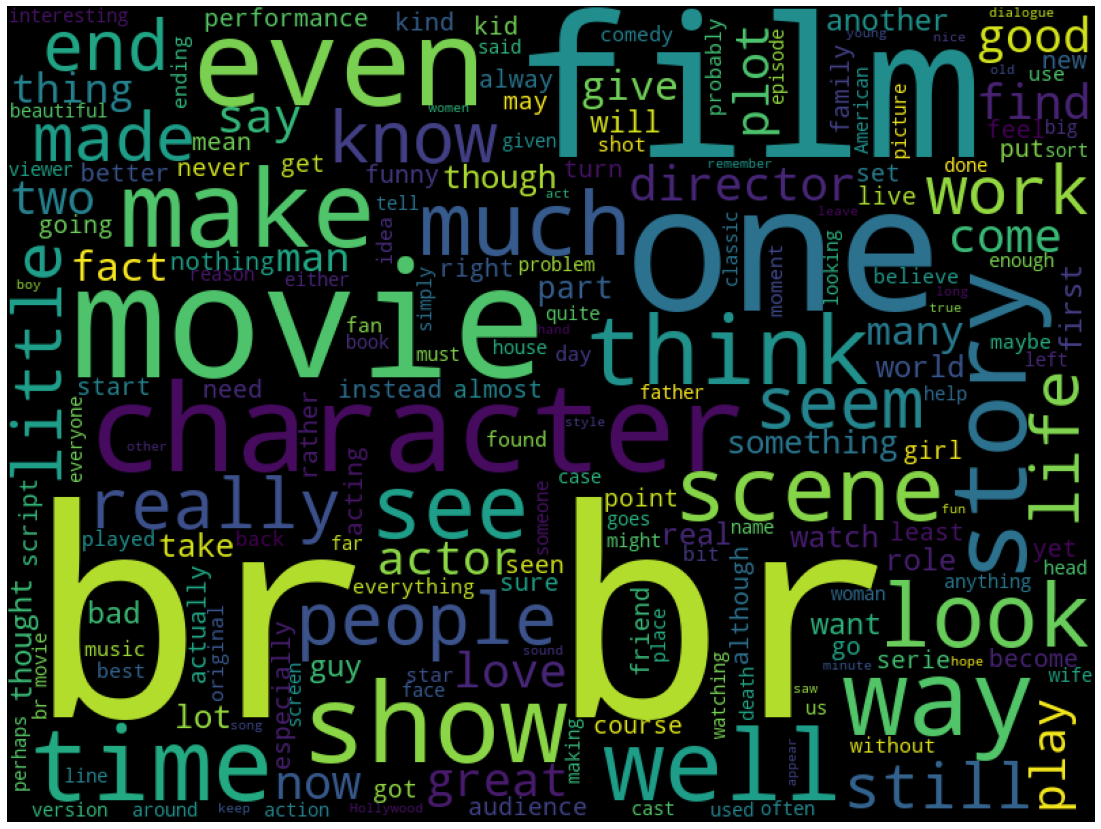

In [ ]:
from wordcloud import WordCloud

cloud = WordCloud(width = 800, height = 600).generate(' '.join(train_data['review']))
plt.figure(figsize = (20, 15))
plt.imshow(cloud)
plt.axis('off')

12500 12500


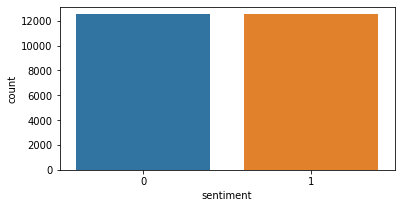

In [ ]:
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])

print(train_data['sentiment'].value_counts()[1], train_data['sentiment'].value_counts()[0])
# 감정 label 분포확인

In [ ]:
# 띄어쓰기 기준으로 단어의 길이를 가지는 변수 설정
train_word_counts = train_data['review'].apply(lambda x: len(x.split(' ')))

Text(0, 0.5, 'Number of words')

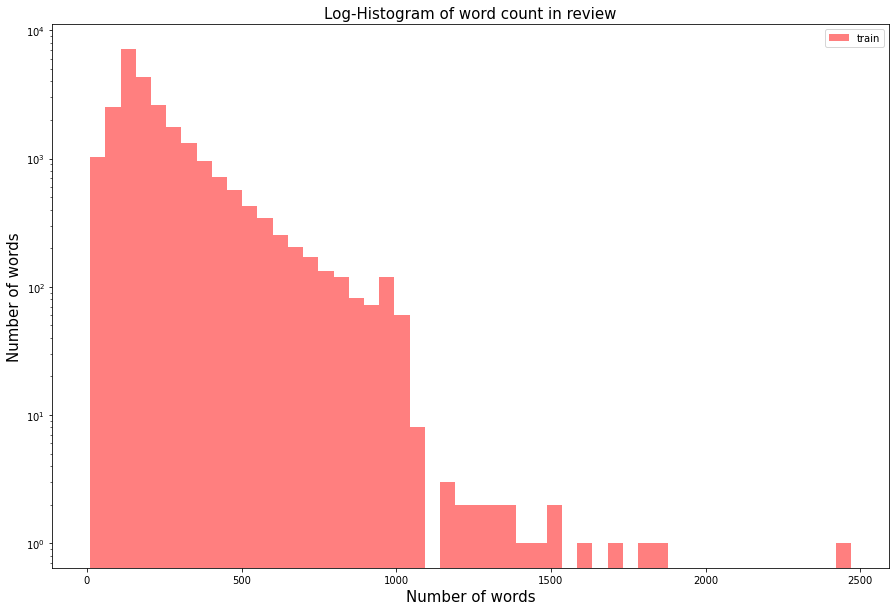

In [ ]:
# 단어 길이 재시각화
plt.figure(figsize = (15, 10))
plt.hist(train_word_counts, bins = 50, alpha = 0.5, color = 'r', label = 'train')
plt.yscale('log', nonposy = 'clip')
plt.legend()
plt.title('Log-Histogram of word count in review', fontsize = 15)
plt.xlabel('Number of words', fontsize = 15)
plt.ylabel('Number of words', fontsize = 15)

In [ ]:
train_word_counts.describe()

count    25000.000000
mean       233.786240
std        173.745845
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: review, dtype: float64

In [ ]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) # 물음표가 마지막으로 쓰임
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper())) # 첫번째 대문자
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x]))) # 대문자 개수
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자 개수

print(qmarks, fullstop, capital_first, capitals, numbers)

0.29552 0.99688 0.0 0.99592 0.56656


## Data Preprocessing

In [ ]:
# 필요한 라이브러리 임포트
import re
import pandas
import numpy
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [ ]:
DATA_IN_PATH = '/content/'
train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
print(train_data['review'][0]) # 첫번째 데이터

## <br>과 같은 HTML 태그와 특수문자를 지워야 함

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [ ]:
review = train_data['review'][0] # 리뷰 중 하나를 가져온다.
review_text = BeautifulSoup(review,"html5lib").get_text() # HTML 태그 제거
review_text = re.sub("[^a-zA-Z]", " ", review_text ) # 영어 문자를 제외한 나머지는 모두 공백으로 바꾼다.

In [ ]:
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [ ]:
# 불용어(stopword) 삭제
# NLTK 라이브러리 사용
stop_words = set(stopwords.words('english')) # 영어 불용어들의 set을 만든다.

review_text = review_text.lower()
words = review_text.split() # 소문자 변환 후 단어마다 나눠서 단어 리스트로 만든다.
words = [w for w in words if not w in stop_words] # 불용어 제거한 리스트를 만든다

LookupError: ignored

In [ ]:
review_text